In [1]:
import pandas as pd
sofr = pd.read_excel('../rawdata/Search.xlsx')

C:\Users\jay_hook\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
sofr.columns

Index(['Effective Date', 'Rate Type', 'Rate (%)', '1st Percentile (%)',
       '25th Percentile (%)', '75th Percentile (%)', '99th Percentile (%)',
       'Volume ($Billions)', 'Target Rate From (%)', 'Target Rate To (%)',
       'Intra Day - Low (%)', 'Intra Day - High (%)', 'Standard Deviation (%)',
       '30-Day Average SOFR', '90-Day Average SOFR', '180-Day Average SOFR',
       'SOFR Index', 'Revision Indicator (Y/N)', 'Footnote ID'],
      dtype='object')

In [3]:
sofr = sofr.loc[:,['Effective Date', 'Rate (%)']]

In [4]:
sofr.columns = ['날짜', 'sofr']

In [5]:
sofr['날짜'] = pd.to_datetime(sofr['날짜'])

In [6]:
sofr

,날짜,sofr
0,2023-09-28,5.31
1,2023-09-27,5.32
2,2023-09-26,5.31
3,2023-09-25,5.31
4,2023-09-22,5.30
...,...,...
1369,2018-04-06,1.75
1370,2018-04-05,1.75
1371,2018-04-04,1.74
1372,2018-04-03,1.83


In [7]:
sofr.isna().sum()

날짜      0
sofr    0
dtype: int64

In [8]:
sofr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      1374 non-null   datetime64[ns]
 1   sofr    1374 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.6 KB


In [9]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [10]:
cd = pd.read_excel('../rawdata/91_CD_Yr._2010_2023.xls')

In [11]:
cd = cd.drop([0, 1],axis=0)

In [12]:
cd.columns = ['날짜', 'CD91']

In [13]:
cd['날짜'] = pd.to_datetime(cd['날짜'])

In [14]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3404 entries, 2 to 3405
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      3404 non-null   datetime64[ns]
 1   CD91    3404 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 53.3 KB


In [15]:
sofr.isna().sum()

날짜      0
sofr    0
dtype: int64

In [16]:
cd.isna().sum()

날짜      0
CD91    0
dtype: int64

In [17]:
sofr.set_index('날짜', inplace=True)
cd.set_index('날짜', inplace=True)

In [18]:
df = pd.concat([sofr,cd], axis=1)

In [20]:
df.isna().value_counts()

sofr   CD91 
True   False    2096
False  False    1308
       True       66
Name: count, dtype: int64

In [22]:
df.interpolate().isna().value_counts()

sofr   CD91 
True   False    2045
False  False    1425
Name: count, dtype: int64

In [25]:
df = df.interpolate()

In [26]:
df['CD91-SOFR'] = df['CD91'] - df['sofr']

In [29]:
df

,sofr,CD91,CD91-SOFR
날짜,,,
2010-01-04,NaN,2.88,NaN
2010-01-05,NaN,2.88,NaN
2010-01-06,NaN,2.88,NaN
2010-01-07,NaN,2.88,NaN
2010-01-08,NaN,2.88,NaN
...,...,...,...
2023-09-22,5.30,3.83,-1.47
2023-09-25,5.31,3.83,-1.48
2023-09-26,5.31,3.83,-1.48


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3470 entries, 2010-01-04 to 2023-09-28
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sofr       1425 non-null   float64
 1   CD91       3470 non-null   float64
 2   CD91-SOFR  1425 non-null   float64
dtypes: float64(3)
memory usage: 108.4 KB


In [30]:
df.reset_index(inplace=True)

In [31]:
df

,날짜,sofr,CD91,CD91-SOFR
0,2010-01-04,NaN,2.88,NaN
1,2010-01-05,NaN,2.88,NaN
2,2010-01-06,NaN,2.88,NaN
3,2010-01-07,NaN,2.88,NaN
4,2010-01-08,NaN,2.88,NaN
...,...,...,...,...
3465,2023-09-22,5.30,3.83,-1.47
3466,2023-09-25,5.31,3.83,-1.48
3467,2023-09-26,5.31,3.83,-1.48
3468,2023-09-27,5.32,3.83,-1.49


In [32]:
output_filename = '../cord&frame/CD91-SOFR.csv'
# 특정 컬럼들을 선택한 후 CSV 파일로 저장
df.to_csv(output_filename, index=False)

In [33]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [34]:
import matplotlib.pyplot as plt

In [35]:
%matplotlib inline

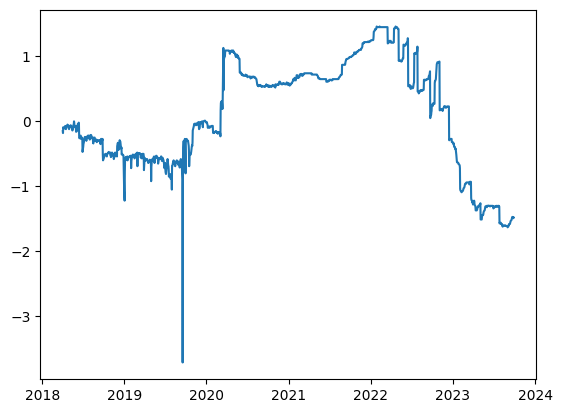

In [36]:
plt.plot(df['날짜'], df['CD91-SOFR'])